# Genérico
Passos utilizados em todos os diferentes modelos.

##Importação de bibliotecas do Python:
- Drive: Para acessar o Google Drive onde o CSV está localizado
- Pandas: Para a manipulação e análise dos dados
- Matplotlib: Para a criação de gráficos
- Numpy: Para a manipulação de arrays
- Seaborn: Para a criação de gráficos 

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

##Acesso ao Google Drive

In [ ]:
drive.mount('/content/drive')
pd.set_option('display.max_columns', None)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Leitura do CSV

In [ ]:
df_teste = pd.read_csv('drive/MyDrive/Colab Notebooks/dados_totais.csv')

##Adiciona a informação de feriados
- Importa uma biblioteca de feriados, formata a coluna de data e cria uma coluna com os feriados.

In [ ]:
import holidays
df_teste['Data'] = pd.to_datetime(df_teste['Data'])
df_teste['Feriado'] = df_teste['Data'].isin(holidays.country_holidays('BR', subdiv='ES', years=[2020,2021,2022]))

##Separação dos dados relacionados ao tempo em colunas diferentes, label conding com os dias da semana e formatação do rat geral.
- Separação da data em três novas colunas: Ano, Mês e Dia.
- Deleção da coluna Data.
- Separação do horário em duas novas colunas: Hora e Minuto.
- Deleção da coluna horário. 
- Troca dos dias da semana por números (label coding).
- Troca da vírgula pelo ponto na separação das casas decimais.

In [ ]:
df_teste.insert(0, 'Ano', df_teste['Data'].dt.year)
df_teste.insert(1, 'Mes', df_teste['Data'].dt.month)
df_teste.insert(2, 'Dia', df_teste['Data'].dt.day)
del df_teste['Data']

df_teste.insert(4, 'Hora', df_teste['Horario'].str.slice(0,2))
df_teste.insert(5, 'Minuto', df_teste['Horario'].str.slice(3,5))
del df_teste['Horario']

df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Segunda', 0, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Terça', 1, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quarta', 2, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Quinta', 3, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sexta', 4, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Sábado', 5, inplace=True)
df_teste['Dia da Semana'].mask(df_teste['Dia da Semana'] == 'Domingo', 6, inplace=True)


df_teste['Total de Indivíduos'] = df_teste['Total de Indivíduos'].str.replace(',', '.')

##Formatação dos dados
- Transformação das colunas Ano, Mês, Dia, Hora, Minuto, Dia da Semana, Total de Indivíduos que estão em formato de string para int.

In [ ]:
df_teste['Ano'] = pd.to_numeric(df_teste['Ano'], errors='coerce')
df_teste['Mes'] = pd.to_numeric(df_teste['Mes'], errors='coerce')
df_teste['Dia'] = pd.to_numeric(df_teste['Dia'], errors='coerce')
df_teste['Hora'] = pd.to_numeric(df_teste['Hora'], errors='coerce')
df_teste['Minuto'] = pd.to_numeric(df_teste['Minuto'], errors='coerce')
df_teste['Dia da Semana'] = pd.to_numeric(df_teste['Dia da Semana'], errors='coerce')
df_teste['Total de Indivíduos'] = pd.to_numeric(df_teste['Total de Indivíduos'], errors='coerce')

##Formatação do horário
O início do dia nos dados começa 6 horas da manhã, contudo, após a meia-noite, representada pelo horário 24:00, a hora é representada com números acima de 24 até voltarmos para as 6 da manhã novamente, além de possuir a data incorreta, uma vez que após a meia-noite, ela deveria passar para o dia seguinte e não permanecer no mesmo. Logo, para aprimorar a medição do tempo, os seguintes passos foram tomados:
- Pega os dados de hora maiores que 23, que representam a partir da meia-noite, estão com a data do dia anterior, então acrescentamos 1 no dia da semana, passando para o dia seguinte.
- Contudo, nas datas que se referem a mudança de domingo para segunda novamente, a categoria do dia da semana passaria a ser 7, mas, não há dia da semana representado pelo número 7, então quando a classificação é maior que 6, ela é subtraída em 7 para que volte a ser 0 e represente a segunda-feira.
- Seguindo a mesma lógica da mudança do dia da semana para o dia seguinte, fazemos o mesmo com dia do mês, todos com horário maior que 23 tem o seu dia aumentado em 1.
- O dia primeiro de janeiro está datado ainda como o ano anterior da meia-noite (acima das 23 horas) até as 6 da manhã, pegamos todos os dados que se referem ao dia primeiro do ano, que atualmente, está datado como dia 32, já que aumentamos um em todos os dias a partir das 23 horas, e acrescentamos 1 em sua coluna "Ano".
- Separamos os dados acima de 23 horas que se referem ao dia 29 de fevereiro, fora de ano bissexto e adicionamos 1 em seu mês e trocamos seu dia para 1.
- Já em ano bissexto, houve apenas 2020, os horários acima de 23 nos dados referentes a 30 de fevereiro tiveram o seu mês acrescido em 1 e o seu dia mudado para dia 1.
- Para corrigir as mudanças de mês, os dados com horário acima de 23 e que pertencem ao dia 31, mas em meses que vão apenas até o dia 30, o mês foi acrescido em 1 e o dia foi transformado em 1. Já em meses que vão até o dia 31, foi pego os dados referentes ao dia 32 e o mesmo processo foi realizado.
- Para transformar o horário para o usual, todos os horários acima de 23 foram subtraídos por 24, por exemplo, se o horário é 26, ao ser subtraído, se transforma em 2 da manhã.

In [ ]:
df_teste.loc[df_teste['Hora'] > 23, 'Dia da Semana'] = df_teste['Dia da Semana']+1 
df_teste.loc[df_teste['Dia da Semana'] > 6, 'Dia da Semana'] = df_teste['Dia da Semana']-7 
df_teste.loc[df_teste['Hora'] > 23, 'Dia'] = df_teste['Dia']+1
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mês'] == 12), 'Ano'] = df_teste['Ano']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 29) & (df_teste['Mês'] == 2) & (df_teste['Ano'] != 2020), 'Mês'] = df_teste['Mês']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 29) & (df_teste['Mês'] == 3) & (df_teste['Ano'] != 2020), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 30) & (df_teste['Mês'] == 2) & (df_teste['Ano'] == 2020), 'Mês'] = df_teste['Mês']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 30) & (df_teste['Mês'] == 3) & (df_teste['Ano'] == 2020), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 31) & (df_teste['Mês'].isin([4,6,9,11])), 'Mês'] = df_teste['Mês']+1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mês'].isin([1,3,5,7,8,10,12])), 'Mês'] = df_teste['Mês']+1 
df_teste.loc[(df_teste['Mês'] == 13), 'Mês'] = 1
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 31) & (df_teste['Mês'].isin([5,7,10,12])), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23) & (df_teste['Dia'] == 32) & (df_teste['Mês'].isin([2,4,6,8,9,11,1])), 'Dia'] = 1 
df_teste.loc[(df_teste['Hora'] > 23), 'Hora'] = df_teste['Hora']-24 

##Adição de uma coluna para o programa BBB
- Coluna que informa "true" se o programa televisionado é o BBB, uma vez que sempre possui valores acima do costume, um outlier que possui relevância para o modelo.

In [ ]:
df_teste['BBB'] = df_teste['Programa'].str.contains('BBB')

##Remoção das colunas não utilizadas
- Deleção da coluna "Programa".

In [ ]:
del df_teste['Programa'], df_teste['Unnamed: 0']

##Uso do get dummies
- O uso do método get_dummies no dataframe realiza um one-hot encoding na categoria do programa televisionado em cada linha, as categorias que não representam aquele dado recebem o valor 0, enquanto a categoria que representa recebe o valor 1.

In [ ]:
df_teste = pd.get_dummies(df_teste)

##Ordenação dos dados, reset do index e remoção da coluna "Ano"
- Ordenação dos valores com níveis de prioridade, uma vez que sem a prioridade, por exemplo, todos os dias 1 estariam ordenados no começo do dataframe e logo, não estaria em ordem cronológica. A prioridade começa pelo ano, assim todos os anos ficam em ordem, após isso vêm o mês, o dia, a hora e o minuto.
- O index é resetado, já que na ordenação, eles ficaram desorganizados e fora de ordem, isso os deixa em ordem novamente.
- Deleção da coluna "Ano".

In [ ]:
df_teste = df_teste.sort_values(['Ano', 'Mes', 'Dia', 'Hora', 'Minuto']).reset_index()
del df_teste['index'], df_teste['Ano']

In [ ]:
df_teste.head(180)

,Mes,Dia,Hora,Minuto,Dia da Semana,Total de Domicílios,Masculino,Feminino,AB,C1,C2,DE,4-11 anos,12-17 anos,18-24 anos,25-34 anos,35-49 anos,50-59 anos,60+ anos,Total de Indivíduos,Masculino FID,Feminino FID,AB FID,C1 FID,C2 FID,DE FID,4-11 anos FID,12-17 anos FID,18-24 anos FID,25-34 anos FID,35-49 anos FID,50-59 anos FID,60+ anos FID,Feriado,BBB,Gênero_ AUDITORIO,Gênero_ CARROS E MOTORES,Gênero_ CULINARIO,Gênero_ DEBATE,Gênero_ DOCUMENTARIO,Gênero_ EDUCATIVO,Gênero_ ENTREVISTA,Gênero_ ESPORTE,Gênero_ FEMININO,Gênero_ FILME,Gênero_ FUTEBOL,Gênero_ GAME SHOW,Gênero_ HUMORISTICO,Gênero_ JORNALISMO,Gênero_ MINISSERIE,Gênero_ MUSICAL,Gênero_ NAO CONSTA,Gênero_ NOVELA,Gênero_ OUTROS,Gênero_ POLITICO,Gênero_ PREMIACAO,Gênero_ REALITY SHOW,Gênero_ RELIGIOSO,Gênero_ REPORTAGEM,Gênero_ RURAL,Gênero_ SERIES,Gênero_ SHOW,Gênero_ SORTEIO,Gênero_ TELE VENDAS
0,6,1,6,0,0,4.27,1.65,2.35,2.40,0.31,0.82,5.23,0.00,0.00,0.00,3.19,1.98,5.81,1.61,88.88,87.40,89.84,79.54,60.00,100.00,100.00,0.00,0.00,0.00,100.00,69.20,100.00,84.31,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6,1,6,5,0,4.89,1.89,2.75,3.02,0.51,1.08,5.23,0.00,0.00,0.00,3.19,2.86,5.81,2.38,95.64,100.00,93.16,100.00,100.00,73.14,100.00,0.00,0.00,0.00,100.00,100.00,100.00,76.90,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,6,1,6,10,0,5.74,1.97,3.24,3.13,1.53,1.22,5.23,0.00,1.22,0.00,3.19,3.52,5.81,2.62,91.26,85.65,94.63,87.15,92.76,82.09,100.00,0.00,80.00,0.00,100.00,84.24,100.00,84.60,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,1,6,15,0,6.55,1.92,3.92,3.06,1.86,1.48,6.46,0.00,1.52,0.00,3.19,4.05,6.65,3.10,92.27,83.40,96.76,85.14,85.40,100.00,100.00,0.00,100.00,0.00,100.00,86.67,89.87,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,6,1,6,20,0,7.27,2.23,4.05,3.49,2.18,1.48,6.46,0.00,1.52,0.00,3.19,4.82,6.90,3.10,96.22,89.34,100.00,90.38,100.00,100.00,100.00,0.00,100.00,0.00,100.00,95.22,93.24,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,6,1,20,35,0,28.41,13.68,17.76,11.65,8.65,25.88,17.42,14.33,16.67,14.04,14.03,7.91,22.44,26.34,98.10,100.00,96.83,100.00,85.97,100.00,100.00,100.00,100.00,100.00,100.00,100.00,94.63,96.71,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
176,6,1,20,40,0,28.05,13.81,16.83,10.82,8.85,25.88,16.33,14.33,15.43,14.04,13.11,7.91,21.73,25.83,95.85,98.57,93.94,98.55,87.96,100.00,89.17,100.00,92.56,100.00,93.44,100.00,92.95,95.37,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
177,6,1,20,45,0,27.19,14.13,16.07,12.42,5.44,26.61,14.96,15.23,12.78,12.88,12.88,9.41,20.79,24.50,96.55,95.69,97.24,96.43,100.00,96.32,95.88,98.54,100.00,97.76,100.00,89.89,95.05,97.75,False,False,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
178,6,1,20,50,0,26.69,12.80,16.01,12.52,5.37,24.36,14.54,13.24,7.51,13.17,11.29,10.32,21.27,24.39,97.48,97.03,97.80,97.26,100.00,98.76,93.65,97.29,100.00,100.00,91.22,98.62,96.06,100.00,False,False,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Regressão Linear

##Criação de dataframes para o modelo

In [ ]:
df_both = df_teste.sample(len(df_teste))
y = df_both["Total de Domicílios"]

##Remoção do output desejado

In [ ]:
df_both.drop(['Total de Domicílios'], axis=1, inplace=True)
df_both.drop(['Masculino'], axis=1, inplace=True)
df_both.drop(['Feminino'], axis=1, inplace=True)
df_both.drop(['AB'], axis=1, inplace=True)
df_both.drop(['C1'], axis=1, inplace=True)
df_both.drop(['C2'], axis=1, inplace=True)
df_both.drop(['DE'], axis=1, inplace=True)
df_both.drop(['4-11 anos'], axis=1, inplace=True)
df_both.drop(['12-17 anos'], axis=1, inplace=True)
df_both.drop(['18-24 anos'], axis=1, inplace=True)
df_both.drop(['25-34 anos'], axis=1, inplace=True)
df_both.drop(['35-49 anos'], axis=1, inplace=True)
df_both.drop(['50-59 anos'], axis=1, inplace=True)
df_both.drop(['60+ anos'], axis=1, inplace=True)
df_both.drop(['Total de Indivíduos'], axis=1, inplace=True)
df_both.drop(['Masculino FID'], axis=1, inplace=True)
df_both.drop(['Feminino FID'], axis=1, inplace=True)
df_both.drop(['AB FID'], axis=1, inplace=True)
df_both.drop(['C1 FID'], axis=1, inplace=True)
df_both.drop(['C2 FID'], axis=1, inplace=True)
df_both.drop(['DE FID'], axis=1, inplace=True)
df_both.drop(['4-11 anos FID'], axis=1, inplace=True)
df_both.drop(['12-17 anos FID'], axis=1, inplace=True)
df_both.drop(['18-24 anos FID'], axis=1, inplace=True)
df_both.drop(['25-34 anos FID'], axis=1, inplace=True)
df_both.drop(['35-49 anos FID'], axis=1, inplace=True)
df_both.drop(['50-59 anos FID'], axis=1, inplace=True)
df_both.drop(['60+ anos FID'], axis=1, inplace=True)

##Uniformização dos dados

In [ ]:
from sklearn.preprocessing import StandardScaler
df_both = StandardScaler().fit_transform(df_both)

##Divisão entre dados de treinamento e de teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_both, y, test_size=0.3, random_state=42)

##Criação do modelo e treinamento

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() #função da regressão linear
lr.fit(X_train, y_train) #inserção dos valores para ensino

LinearRegression()

##Resultado do teste

In [ ]:
test_pred = lr.predict(X_test)
test_pred

array([ 0.96393583,  4.92017363, 15.59772489, ...,  2.47577665,
        5.90448759,  7.46680448])

##Definindo o resultado das métricas do teste
Importação da biblioteca com as métricas específicas e definição de seus resultados.

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(metrics.r2_score(y_test, test_pred)) #R quadrado
print(mean_absolute_error(y_test, test_pred)) #erro médio absoluto
print(mean_squared_error(y_test, test_pred)) #erro médio quadrático

0.5183368701620792
3.341553200094365
20.50198715243522


##Resultado do treinamento

In [ ]:
train_pred = lr.predict(X_train)
train_pred

array([14.62628935, 13.68903349,  4.67832182, ..., 12.4227371 ,
       12.08515165,  9.0654373 ])

##Definindo o resultado das métricas do treinamento
Importação da biblioteca com as métricas específicas e definição de seus resultados.

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
print(metrics.r2_score(y_train, train_pred)) #R quadrado
print(mean_absolute_error(y_train, train_pred)) #erro médio absoluto
print(mean_squared_error(y_train, train_pred)) #erro médio quadrático

0.5151594966486268
3.3484488441935403
20.53103219992044


##Visualização gráfica dos resultados de teste

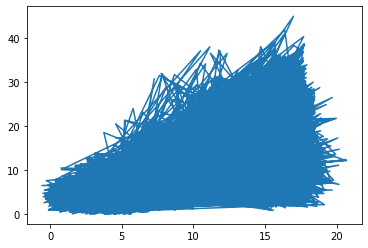

In [ ]:
plt.plot(test_pred, y_test)

##Visualização gráfica do resultados de treinamento

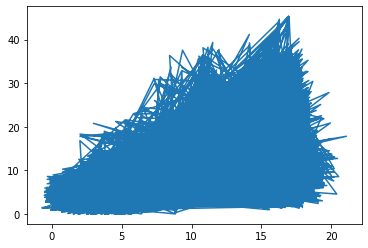

In [ ]:
plt.plot(train_pred, y_train)

##Comparação em tabela do número real e a predição no teste

In [ ]:
results = {'Test Real Value': y_test, 'Test Prediction': test_pred}
df_results = pd.DataFrame(data=results)
df_results.head(100)

,Test Real Value,Test Prediction
156612,3.75,0.963936
105316,3.97,4.920174
149604,22.01,15.597725
132672,21.08,14.169594
5915,9.62,11.356087
...,...,...
9772,6.84,17.143745
173766,8.48,12.417671
56595,13.23,11.332497
211913,9.32,7.100929


##Comparação em tabela do número real e a predição no treinamento

In [ ]:
results = {'Train Real Value': y_train, 'Train Prediction': train_pred}
df_results1 = pd.DataFrame(data=results)
df_results.head(100)

,Test Real Value,Test Prediction
156612,3.75,0.963936
105316,3.97,4.920174
149604,22.01,15.597725
132672,21.08,14.169594
5915,9.62,11.356087
...,...,...
9772,6.84,17.143745
173766,8.48,12.417671
56595,13.23,11.332497
211913,9.32,7.100929
